#Getting Started with NLTK

In [30]:
%matplotlib inline

In [31]:
from nltk.book import *

In [32]:
text1

<Text: Moby Dick by Herman Melville 1851>

##Searching Text

In [33]:
text3.concordance('Adam')

Displaying 18 of 18 matches:
l of the air ; and brought them unto Adam to see what he would call th and wha
what he would call th and whatsoever Adam called every living creature , that 
re , that was the name thereof . And Adam gave names to all cattle , and to th
o every beast of the field ; but for Adam there was not found an help meet for
God caused a deep sleep to fall upon Adam , and he sle and he took one of his 
, and brought her unto the man . And Adam said , This is now bone of my bones 
 the garden in the cool of the d and Adam and his wife hid themselves from the
arden . And the LORD God called unto Adam , and said unto him , Where art thou
d he shall rule over thee . And unto Adam he said , Because thou hast hearkene
nd unto dust shalt thou return . And Adam called his wife ' s name Eve ; becau
 was the mother of all living . Unto Adam also and to his wife did the LORD Go
ep the way of the tree of life . And Adam knew Eve his wife ; and she conceive
y Lamech seventy and se

We can see the contexts in which the word "God" appears in the book of Genesis. We can use the similar() function to see which other words appear in similar contexts to the word "God".

In [22]:
text3.similar("God")

he joseph jacob pharaoh abraham they she isaac sarah him them me i it
abram laban cain israel judah thee


Once we've found words that appear in similar contexts, we can see what those contexts are.

In [24]:
text3.common_contexts(['God','Pharaoh'])

of_and as_had of_saw in_s and_said unto_and which_gave and_was be_s
which_had and_spake and_called before_and of_is


We can also view the dispersion of words in a text (their frequency throughout the text):

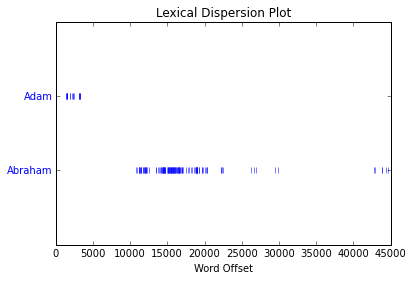

In [42]:
text3.dispersion_plot(['Adam','Abraham'])

##Counting Vocabulary

In [44]:
len(text3) # number of words and punctuation symbols.

44764

In [45]:
len(set(text3)) # number of distinct words and punctuation symbols

2789

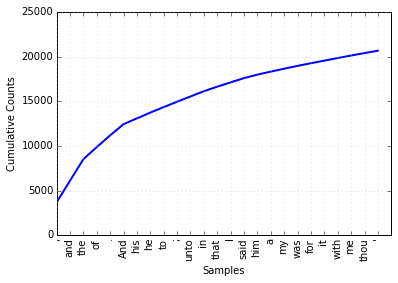

In [56]:
frequency_distribution = FreqDist(text3)
frequency_distribution.plot(25, cumulative = True) # 25 most common words

In [58]:
sorted(set(text3),key = len,reverse= True)[:10] # 10 longest words

['interpretations',
 'Zaphnathpaaneah',
 'threshingfloor',
 'Jegarsahadutha',
 'interpretation',
 'uncircumcised',
 'plenteousness',
 'sheepshearers',
 'womenservants',
 'EleloheIsrael']

##Collocations and Bigrams

A **collocation** is a sequence of words that occur together unusually often, such as *red wine*.

To get a handle on collocations, we can extract pairs of words, known as **bigrams**.

In [60]:
list(bigrams(['more','is','said','than','done']))

[('more', 'is'), ('is', 'said'), ('said', 'than'), ('than', 'done')]

In [63]:
text3.collocations(window_size = 2)

said unto; pray thee; thou shalt; thou hast; thy seed; years old;
spake unto; thou art; LORD God; every living; God hath; begat sons;
seven years; shalt thou; little ones; living creature; creeping thing;
savoury meat; thirty years; every beast


#Processing Raw Text

In [78]:
import nltk, re, pprint
from nltk import word_tokenize
from urllib import request


In [71]:
url = "http://www.gutenberg.org/files/2554/2554.txt"
response = request.urlopen(url)
raw = response.read().decode('utf8')
print(type(raw))
print(len(raw))

<class 'str'>
1176896


In [72]:
tokens = word_tokenize(raw)

In [74]:
len(tokens)

254352

In [76]:
tokens[:10]

['The',
 'Project',
 'Gutenberg',
 'EBook',
 'of',
 'Crime',
 'and',
 'Punishment',
 ',',
 'by']

We can create an NTLK text from our tokens, which allows for further processing:

In [79]:
text = nltk.Text(tokens)
text[1024:1062]

['CHAPTER',
 'I',
 'On',
 'an',
 'exceptionally',
 'hot',
 'evening',
 'early',
 'in',
 'July',
 'a',
 'young',
 'man',
 'came',
 'out',
 'of',
 'the',
 'garret',
 'in',
 'which',
 'he',
 'lodged',
 'in',
 'S.',
 'Place',
 'and',
 'walked',
 'slowly',
 ',',
 'as',
 'though',
 'in',
 'hesitation',
 ',',
 'towards',
 'K.',
 'bridge',
 '.']

In [81]:
text.collocations()

Katerina Ivanovna; Pyotr Petrovitch; Pulcheria Alexandrovna; Avdotya
Romanovna; Rodion Romanovitch; Marfa Petrovna; Sofya Semyonovna; old
woman; Project Gutenberg-tm; Porfiry Petrovitch; Amalia Ivanovna;
great deal; Nikodim Fomitch; young man; Ilya Petrovitch; n't know;
Project Gutenberg; Dmitri Prokofitch; Andrey Semyonovitch; Hay Market


##Dealing with HTML

We can use the BeautifulSoup library to handle HTML.

In [82]:
url = "http://news.bbc.co.uk/2/hi/health/2284783.stm"
html = request.urlopen(url).read().decode('utf8')
html[:60]

'<!doctype html public "-//W3C//DTD HTML 4.0 Transitional//EN'

In [86]:
from bs4 import BeautifulSoup
raw = BeautifulSoup(html).get_text()
tokens = word_tokenize(raw)
tokens = tokens[110:390]
text = nltk.Text(tokens)
text.concordance('gene')

Displaying 5 of 5 matches:
hey say too few people now carry the gene for blondes to last beyond the next 
blonde hair is caused by a recessive gene . In order for a child to have blond
 have blonde hair , it must have the gene on both sides of the family in the g
ere is a disadvantage of having that gene or by chance . They do n't disappear
des would disappear is if having the gene was a disadvantage and I do not thin


##The NLP Pipeline

The Processing Pipeline:
    - Get a document, strip HTML if needed.
    - Tokenize the text, selecting tokens of interest.
    - Create NLTK text
    - Normalize the words (e.g. stem), build vocabulary.

In [89]:
url = url = "http://news.bbc.co.uk/2/hi/health/2284783.stm"
html = request.urlopen(url).read().decode('utf-8')
tokens = word_tokenize(BeautifulSoup(html).get_text())
text = nltk.Text(tokens[110:390]) # Determine indices delineating body of text.
vocab = sorted(set([word.lower() for word in text]))
vocab[20:30]

['become',
 'believe',
 'beyond',
 'blame',
 'blonde',
 'blondes',
 'born',
 'both',
 'bottle',
 'bottle-blondes']

##Normalizing Text

In addition to, say, making the text all lower-case, we might want to strip out any additional affixes. This is known as **stemming**. A further step is to make sure the resulting form is a known word in a dictionary, a task known as **lemmatization**.

###Stemmers

In [97]:
porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()
raw = "DENNIS: Listen, strange women lying in ponds distributing swords \
is no basis for a system of government.  Supreme executive power derives \
from a mandate from the masses, not from some farcical aquatic ceremony."
tokens = word_tokenize(raw)
print([porter.stem(t) for t in tokens][:8])
print([lancaster.stem(t) for t in tokens][:8])

['DENNI', ':', 'Listen', ',', 'strang', 'women', 'lie', 'in']
['den', ':', 'list', ',', 'strange', 'wom', 'lying', 'in']


###Lemmatization

The WordNet lemmatizer only removes affixes if the resulting word is in its dictionary. This makes it slower, but it can result in a more accurate stemming, although not nearly as exhaustive.

In [98]:
wnl = nltk.WordNetLemmatizer()
print([wnl.lemmatize(t) for t in tokens][:8])

['DENNIS', ':', 'Listen', ',', 'strange', 'woman', 'lying', 'in']
